<a href="https://colab.research.google.com/github/ydblank/ModelSelectionExercise/blob/main/Model_Selection_and_Hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Hypertuning





## Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set a seed for reproducibility
np.random.seed(42)

## Load the data

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()


,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Remove ID

In [3]:
df = df.drop(["ID"],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Create training and test datasets

In [4]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Preprocessing

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Apply model selection

In [6]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("SVR", SVR())
]

# Model Selection based on RMSE and RMSE_CV
best_model = None
best_rmse = float('inf')

for model_name, model in models:
    # Cross-Validation
    rmse_cv = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    mean_rmse_cv = rmse_cv.mean()
    
    print(f"{model_name} - RMSE_CV: {mean_rmse_cv}")
    
    # Choose the best model based on cross-validation performance
    if mean_rmse_cv < best_rmse:
        best_rmse = mean_rmse_cv
        best_model = model_name

Linear Regression - RMSE_CV: 1.6340478922988417


Random Forest - RMSE_CV: 0.8696190371962169
SVR - RMSE_CV: 2.022091018650504


## Hyperparameter Tuning Using Gridsearch

In [7]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


## Train and Test Best Model

In [8]:
# Train the best model
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Test the model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on Test Set: {rmse}")

RMSE on Test Set: 0.6778426672034463


## Plot Model Performace

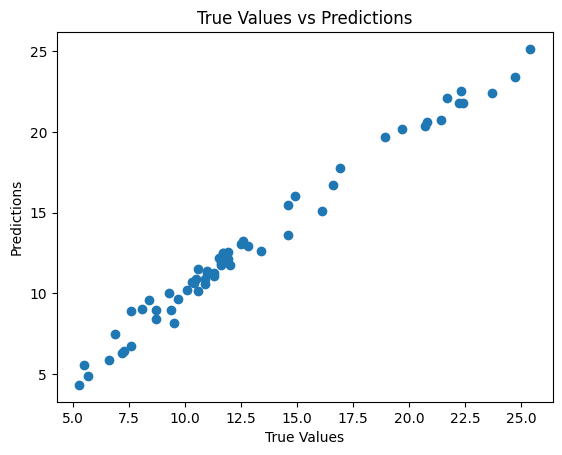

In [9]:
# Plot the predicted values against the true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()